# Introduction
## Content:
- Aim: To show how to use BayesRTO.py
1. Apply BayesRTO on Benoit Problem

In [1]:
import jax
from jax import grad, value_and_grad, jit, vmap
import numpy as np
import jax.numpy as jnp
from scipy.optimize import minimize, fsolve
import matplotlib.pyplot as plt
import os
import imageio.v2 as imageio
import pandas as pd
from IPython.display import Image

import BayesRTOjax
import Benoit_Problem

# 1. Benoit Problem
## A. Illustration of Benoit's Problem

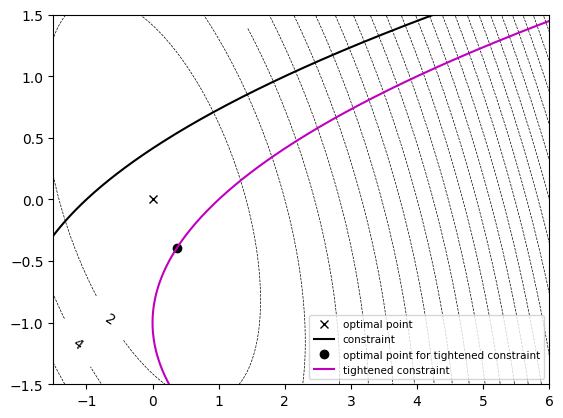

In [2]:
# plant_drawing(is_constraint=True,is_tight_constraint=False)
Benoit_Problem.plant_drawing(is_constraint=True,is_tight_constraint=True)
plt.legend(["optimal point",
            "constraint",
            'optimal point for tightened constraint',
            'tightened constraint'],
                fontsize = 7.5)
plt.show()



## B. Use Real-Time Optimization with Gaussian Process

In [3]:
# Initialization
plant_system = [Benoit_Problem.Benoit_System_1,
                Benoit_Problem.con1_system,
                Benoit_Problem.con1_system_tight]

GP_m = BayesRTOjax.BayesianOpt(plant_system)

# Data Sampling
n_sample = 4
x_i = jnp.array([1.4,-0.8])
r = 0.5

X,Y = GP_m.Data_sampling(n_sample,x_i,r)

# GP initialization
GP_m.GP_initialization(X, Y, 'RBF', multi_hyper=10, var_out=True)

# Real-Time Optimization 
n_iter = 5
multistart=5
b = 0.

data = GP_m.RTOminimize(n_iter=n_iter,x_initial=x_i,radius=r,
                        multi_start=multistart,b=b)

### Data Processing

In [4]:
processed_data = {
    'x_new_0': data['x_new'][:, 0],
    'x_new_1': data['x_new'][:, 1],
    'plant_output_0': data['plant_output'][:, 0],
    'plant_output_1': data['plant_output'][:, 1],
    'plant_output_2': data['plant_output'][:, 2],
    'TR_radius': data['TR_radius']
}

In [5]:
df = pd.DataFrame(processed_data)
df

,x_new_0,x_new_1,plant_output_0,plant_output_1,plant_output_2,TR_radius
0,0.945946,-0.590632,0.684954,2.778364,0.778364,0.5
1,0.722496,-0.143340,0.438985,1.988629,-0.011371,0.5
2,0.777867,-0.129709,0.521005,2.020461,0.020461,0.5
3,0.560356,-0.262482,0.235812,2.016424,0.016424,0.5
4,0.393174,-0.334282,0.134899,1.949994,-0.050006,0.5


### Graphical Illustration

In [6]:
filenames = []
for i in range(len(df)):
    # Create Frame
    t = i * 0.1
    filename = f'frame_{i:02d}.png'
    Benoit_Problem.create_frame(Benoit_Problem.BRTO_Benoit_drawing(processed_data,i),filename)
    filenames.append(filename)

# Create GIF
frame_duration = 1000
GIFname = 'BRTO_Benoit.gif'
Benoit_Problem.create_GIF(frame_duration,filenames,GIFname)

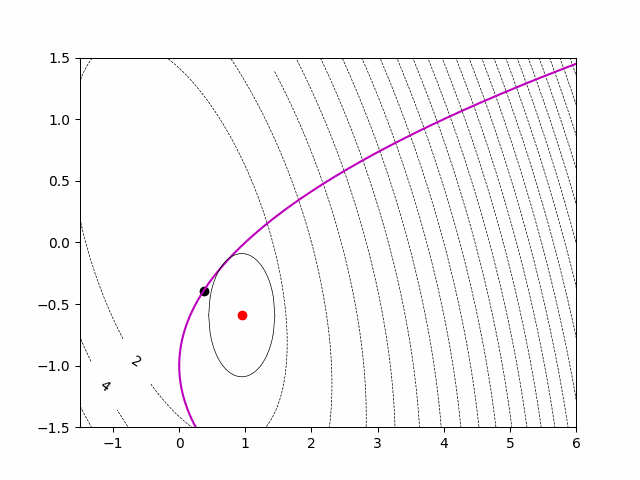

In [7]:
Image(os.path.join('output', "BRTO_Benoit.gif"))